In [124]:
import os
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir("/home/sophie/projects/windspeed/bin/") # change to directory where the module is. Must be a better way?
from group_tseries import read_file

In [125]:
Sud=['62600WadiHalfa','62640AbuHamed','62650Dongola','62660Karima',
'62680Atbara'] 

wind = read_file(Sud[1])
print wind[0:10]

                              date_time  year month day  hour       ws  ws_0  \
date_time                                                                      
1984-03-01 12:00:00 1984-03-01 12:00:00  1984     3   1    12  5.16082   NaN   
1984-03-02 12:00:00 1984-03-02 12:00:00  1984     3   2    12  3.49453   NaN   
1984-03-04 06:00:00 1984-03-04 06:00:00  1984     3   4     6  3.24567   NaN   
1984-03-05 12:00:00 1984-03-05 12:00:00  1984     3   5    12  3.89541   NaN   
1984-03-05 18:00:00 1984-03-05 18:00:00  1984     3   5    18  5.70983   NaN   
1984-03-06 18:00:00 1984-03-06 18:00:00  1984     3   6    18  4.36439   NaN   
1984-03-07 12:00:00 1984-03-07 12:00:00  1984     3   7    12  3.57281   NaN   
1984-03-08 12:00:00 1984-03-08 12:00:00  1984     3   8    12  2.92309   NaN   
1984-03-09 06:00:00 1984-03-09 06:00:00  1984     3   9     6  4.48241   NaN   
1984-03-09 12:00:00 1984-03-09 12:00:00  1984     3   9    12  1.13027   NaN   

                       ws_06    ws_12  

In [126]:
# Adding rows to the wind dataFrame, ready for grouping

wind['ws_0']= wind['ws'][wind['hour'].isin([0])]
wind['ws_06']= wind['ws'][wind['hour'].isin([6])]
wind['ws_12']= wind['ws'][wind['hour'].isin([12])]
wind['ws_18']= wind['ws'][wind['hour'].isin([18])]

group = wind.groupby(['year','month']) # This is just the grouping object
wind_group = group['ws','ws_0','ws_06','ws_12','ws_18'].aggregate([np.mean,np.std])

In [127]:
# Count how many observations go into each group. 
# We need this to decide whether there are enough observations per month, i.e. 10

print group['ws'].count()[0:10]
print group['ws_06'].count()[0:10]
b = group.count()
print b[0:10]

year  month
1984  10        1
      12        4
      3        43
      4         2
      5         1
      7         5
      8        12
1985  1         1
      11        4
      12       32
Name: ws, dtype: int64
year  month
1984  10        1
      12        1
      3        16
      4         1
      5         0
      7         1
      8         4
1985  1         1
      11        2
      12       15
Name: ws_06, dtype: int64
            date_time  day  hour  ws  ws_0  ws_06  ws_12  ws_18
year month                                                     
1984 10             1    1     1   1     0      1      0      0
     12             4    4     4   4     0      1      3      0
     3             43   43    43  43     0     16     18      9
     4              2    2     2   2     0      1      1      0
     5              1    1     1   1     0      0      0      1
     7              5    5     5   5     0      1      4      0
     8             12   12    12  12     0      4      

In [128]:
# Some of these numbers are quite dire! Could we only plot those that are over a threshold i.e. 10?
# This only removes columns where the total number of observations is less than 10. It doesn't do it for each column 
# seperately

bop = wind.groupby(['year','month']).filter(lambda x: len(x) > 10, dropna=False) 
# this returns another dataframe but
# but is not actually dropping anything
# for anything other than the whole 
# dataframe. 

print bop['ws_18'][0:20]

#bop_group = bop.aggregate([np.mean,np.std])

bop_2 = bop.groupby(['year','month']) # Now we actually group them ready for averaging

print bop_2['ws_18'].count()[0:10] # Here we see none of these groups have more than 10 obs. We want these to all be nan.

wind_bop = bop_2['ws','ws_0','ws_06','ws_12','ws_18'].aggregate([np.mean])

print wind_bop[0:10] # The problem is it still gives us an average, even if there are less than 10 obs in that column.

date_time
1984-03-01 12:00:00        NaN
1984-03-02 12:00:00        NaN
1984-03-04 06:00:00        NaN
1984-03-05 12:00:00        NaN
1984-03-05 18:00:00    5.70983
1984-03-06 18:00:00    4.36439
1984-03-07 12:00:00        NaN
1984-03-08 12:00:00        NaN
1984-03-09 06:00:00        NaN
1984-03-09 12:00:00        NaN
1984-03-10 06:00:00        NaN
1984-03-10 12:00:00        NaN
1984-03-10 18:00:00    9.32930
1984-03-11 12:00:00        NaN
1984-03-11 18:00:00    9.12144
1984-03-12 06:00:00        NaN
1984-03-12 12:00:00        NaN
1984-03-14 12:00:00        NaN
1984-03-15 06:00:00        NaN
1984-03-15 12:00:00        NaN
Name: ws_18, dtype: float64
year  month
1984  3        9
      8        0
1985  12       3
1986  1        3
      12       6
      2        8
      3        9
      4        5
      5        4
      6        0
Name: ws_18, dtype: int64
                  ws ws_0     ws_06     ws_12     ws_18
                mean mean      mean      mean      mean
year month            

In [141]:
# Try specifying the column to apply the function to

# Adding len(x['ws_18']) doesn't seem to make any difference.
bop_18 = wind.groupby(['year','month']).filter(lambda x: len(x['ws_18']) > 10)

print bop_18[0:10]

bopping = bop_18.groupby(['year','month']) # Now apply grouping

wind_bop18 = bopping['ws','ws_0','ws_06','ws_12','ws_18'].aggregate([np.mean])

print wind_bop18['ws_18'][0:10]  # Not working either!!
print wind_bop['ws_18'][0:10]

                              date_time  year month day  hour       ws  ws_0  \
date_time                                                                      
1984-03-01 12:00:00 1984-03-01 12:00:00  1984     3   1    12  5.16082   NaN   
1984-03-02 12:00:00 1984-03-02 12:00:00  1984     3   2    12  3.49453   NaN   
1984-03-04 06:00:00 1984-03-04 06:00:00  1984     3   4     6  3.24567   NaN   
1984-03-05 12:00:00 1984-03-05 12:00:00  1984     3   5    12  3.89541   NaN   
1984-03-05 18:00:00 1984-03-05 18:00:00  1984     3   5    18  5.70983   NaN   
1984-03-06 18:00:00 1984-03-06 18:00:00  1984     3   6    18  4.36439   NaN   
1984-03-07 12:00:00 1984-03-07 12:00:00  1984     3   7    12  3.57281   NaN   
1984-03-08 12:00:00 1984-03-08 12:00:00  1984     3   8    12  2.92309   NaN   
1984-03-09 06:00:00 1984-03-09 06:00:00  1984     3   9     6  4.48241   NaN   
1984-03-09 12:00:00 1984-03-09 12:00:00  1984     3   9    12  1.13027   NaN   

                       ws_06    ws_12  

In [112]:
#wind.groupby(['year','month']).count().add_prefix('count_')

In [108]:
wind.groupby(['year', 'month']).size()[0:10] # does the same as count, though you can't specify a column. 

year  month
1984  10        1
      12        4
      3        43
      4         2
      5         1
      7         5
      8        12
1985  1         1
      11        4
      12       32
dtype: int64

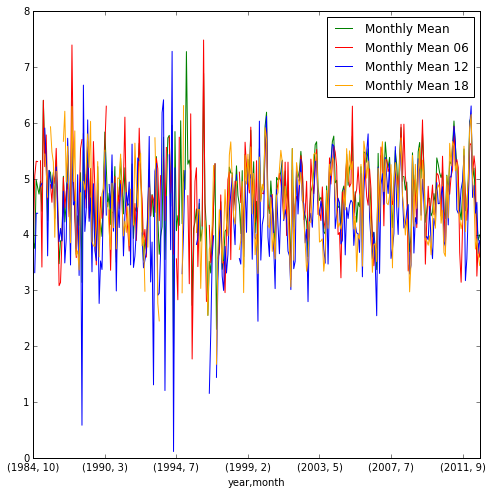

In [88]:
# make a plot

wind_group.ws['mean'].plot(figsize=(8,8), c = 'g',legend=True, label='Monthly Mean')
wind_group.ws_06['mean'].plot(figsize=(8,8), c = 'r',legend=True, label='Monthly Mean 06')
wind_group.ws_12['mean'].plot(figsize=(8,8), c = 'b',legend=True, label='Monthly Mean 12')
wind_group.ws_18['mean'].plot(figsize=(8,8), c = 'orange',legend=True, label='Monthly Mean 18')